In [5]:
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import os, glob

In [6]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [11]:
def convert(image_dir_path):
        print("이미지 디렉토리 경로: ", image_dir_path)

        images=glob.glob(image_dir_path + "/*.jpg")  

        # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
        target_size=(28,28)
        for img in images:
            old_img=Image.open(img)
            new_img=old_img.resize(target_size,Image.ANTIALIAS)
            new_img.save(img,"JPEG")

        print("resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

rock = os.getenv("HOME") + "/rock_scissor_paper/rock"
paper = os.getenv("HOME") + "/rock_scissor_paper/paper"
convert(rock)
convert(paper)

이미지 디렉토리 경로:  /home/aiffel/rock_scissor_paper/rock
resize 완료!
이미지 디렉토리 경로:  /home/aiffel/rock_scissor_paper/paper
resize 완료!


In [91]:
def convert_png_to_jpg(image_dir_path):
        print("이미지 디렉토리 경로: ", image_dir_path)
        images=glob.glob(image_dir_path + "/"+image_dir_path.split('/')[-1]+"_*.png")  

        # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
        target_size=(28,28)
        for x,img in enumerate(images):
            old_img=Image.open(img)
            old_img = old_img.convert('RGB')
            new_img=old_img.resize(target_size,Image.ANTIALIAS)
            new_img.save('/'.join(img.split('/')[:-1]) +f"/{x}.jpg","JPEG")
            os.remove(img) #old_img는 삭제해줌
        print("resize 완료!")

In [92]:
#png파일을 jpg로 바꾸고, 28x28사이즈로 바꾼다.
rock = os.getenv("HOME") + "/rock_scissor_paper_png/rock"
paper = os.getenv("HOME") + "/rock_scissor_paper_png/paper"
scissor = os.getenv("HOME") + "/rock_scissor_paper_png/scissor"

convert_png_to_jpg(rock)
convert_png_to_jpg(paper)
convert_png_to_jpg(scissor)

이미지 디렉토리 경로:  /home/aiffel/rock_scissor_paper_png/rock
resize 완료!
이미지 디렉토리 경로:  /home/aiffel/rock_scissor_paper_png/paper
resize 완료!
이미지 디렉토리 경로:  /home/aiffel/rock_scissor_paper_png/scissor
resize 완료!


In [71]:
#iglob으로 하게 되면 제너레이터로 되서 메모리 절약이 가능함 그런데, length를 구하는게 좀 불편한거 같다.
img_path = os.getenv("HOME") + "/rock_scissor_paper_png"
scissor = glob.iglob(img_path + "/scissor/scissor_*.jpg")
rock = glob.iglob(img_path + "/scissor/rock_*.jpg")
paper = glob.iglob(img_path + "/scissor/paper_*.jpg")

In [46]:
#glob으로 하게 되면 리스트로 불러와서 length를 바로 구할 수 있는데, 메모리에 부담이 커짐.(glob으로 불러오는 데이터가 클 경우 문제 발생)
img_path = os.getenv("HOME") + "/rock_scissor_paper_png"
scissor = glob.glob(img_path + "/scissor/scissor_*.jpg")
rock = glob.glob(img_path + "/rock/rock_*.jpg")
paper = glob.glob(img_path + "/paper/paper_*.jpg")

In [193]:
import numpy as np

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    scissor = glob.glob(img_path + "/scissor/*.jpg")
    rock = glob.glob(img_path + "/rock/*.jpg")
    paper = glob.glob(img_path + "/paper/*.jpg")
    
    number_of_data=  len(scissor)+len(rock)+len(paper)
    data = number_of_data*2/3
    data = int(data)
    test_data = number_of_data-data

    img_size=28
    color=3
    
    train_imgs=np.zeros(data*img_size*img_size*color,dtype=np.int32).reshape(data,img_size,img_size,color)
    train_labels=np.zeros(data,dtype=np.int32)
    
    test_imgs=np.zeros(test_data*img_size*img_size*color,dtype=np.int32).reshape(test_data,img_size,img_size,color)
    test_labels=np.zeros(test_data,dtype=np.int32)
    
    td=int(data/3)
        
    train_scissor = scissor[:td]
    train_rock = rock[:td]
    train_paper = paper[:td]
    
    test_scissor = scissor[td:]
    test_rock = rock[td:]
    test_paper = paper[td:]
    
#     """"""
    idx=0
    for file in train_scissor:
        img = np.array(Image.open(file),dtype=np.int32)
        train_imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        train_labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in train_rock:
        img = np.array(Image.open(file),dtype=np.int32)
        train_imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        train_labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in train_paper:
        img = np.array(Image.open(file),dtype=np.int32)
        train_imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        train_labels[idx]=2   # 보 : 2
        idx=idx+1
        
    tidx=0
        
    for file in test_scissor:
        img = np.array(Image.open(file),dtype=np.int32)
        test_imgs[tidx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        test_labels[tidx]=0   # 가위 : 0
        tidx=tidx+1

    for file in test_rock:
        img = np.array(Image.open(file),dtype=np.int32)
        test_imgs[tidx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        test_labels[tidx]=1   # 바위 : 1
        tidx=tidx+1       
    
    for file in test_paper:
        img = np.array(Image.open(file),dtype=np.int32)
        test_imgs[tidx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        test_labels[tidx]=2   # 보 : 2
        tidx=tidx+1
    
#     """"""
    print("학습데이터(x_train)의 이미지 개수는",idx+tidx,"입니다.")
    return train_imgs, train_labels, test_imgs, test_labels

In [194]:
image_dir_path = os.getenv("HOME") + "/rock_scissor_paper_png"
(x_train, y_train,x_test,y_test)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 2520 입니다.
x_train shape: (1680, 28, 28, 3)
y_train shape: (1680,)
x_test shape: (840, 28, 28, 3)
y_test shape: (840,)


라벨:  0


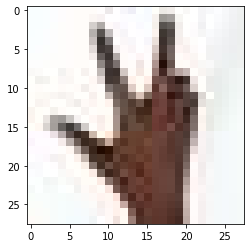

In [195]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [196]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_25 (Dense)             (None, 10)              

In [197]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
53/53 [==============================] - 0s 1ms/step - loss: 12.2256 - accuracy: 0.4774
Epoch 2/10
53/53 [==============================] - 0s 1ms/step - loss: 0.6317 - accuracy: 0.8006
Epoch 3/10
53/53 [==============================] - 0s 1ms/step - loss: 0.2341 - accuracy: 0.9089
Epoch 4/10
53/53 [==============================] - 0s 1ms/step - loss: 0.1158 - accuracy: 0.9625
Epoch 5/10
53/53 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9833
Epoch 6/10
53/53 [==============================] - 0s 1ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 7/10
53/53 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9929
Epoch 8/10
53/53 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9958
Epoch 9/10
53/53 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 0.9976
Epoch 10/10
53/53 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 0.9988


In [200]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

27/27 - 0s - loss: 0.0084 - accuracy: 0.9988
test_loss: 0.008408711291849613 
test_accuracy: 0.9988095164299011
